### Exercise 3.3

This exercise will explore the relationship between the sparsity $K$, the signal size $n$, and the number of samples $p$ in compressed sensing.

(a) For $n=1000$ and $K=5$, create a $K$-sparse vector $s$ of Fourier coefficients in a Fourier basis $\Psi$. 

For each $p$ from $1$ to $100$, create a Gaussian random sampling matric $C \in \mathbb{R}^{p\times n}$ to create a measurement vector $y=C\Psi s$. 

Use compressed sensing based on this measurement to estimate $\hat{s}$. 

For each $p$, repeat this with at least $10$ realizations of the random measurement matrix $C$. 

Plot the average relative error of $\|\hat{s}-s\|_2  / \|s\|$ versus $p$; it may be helpful to visualize the errors with a box-and-whisker plot.

Explain the trends. Also plot the average $\ell_1$ and $\ell_0$ error versus $p$.

In [1]:
import numpy as np
from scipy.fftpack import dct, idct

In [2]:
np.random.seed(6397)

n = 1000
K = 5

Psi = dct(np.eye(n))

s = np.zeros((n,))
id_ones = np.random.choice(n, K)
s[id_ones] = 1

s = Psi @ (Psi@s)

In [3]:
print(Psi.shape)
print(s.shape)

(1000, 1000)
(1000,)


In [4]:
import os
import sys
from scipy.optimize import minimize
sys.path.append(os.path.join('..','UTILS'))
from cosamp_fn import cosamp

In [5]:
def rel_error_p(n, p, s, Psi, nsim):
    
    err_l0 = np.zeros((p, nsim))
    err_l1 = np.zeros((p, nsim))
    err_l2 = np.zeros((p, nsim))

    for i in range(p):
        for j in range(nsim):
            C = np.random.normal(loc=0.0, scale=1.0, size=(p+1,n))
            Theta = C @ Psi 
            y = Theta @ s

            s_hat = cosamp(Theta, y, 10, epsilon=1.e-10, max_iter=10**2) 

            err_l0[i,j] = np.linalg.norm(s_hat-s, ord=0)/ np.linalg.norm(s, ord=0)
            err_l1[i,j] = np.linalg.norm(s_hat-s, ord=1)/ np.linalg.norm(s, ord=1)
            err_l2[i,j] = np.linalg.norm(s_hat-s, ord=2)/ np.linalg.norm(s, ord=2)

    return err_l0, err_l1, err_l2


In [7]:
p_vec = np.arange(1,100+1)

err_l0, err_l1, err_l2 = rel_error_p(n=n, p=len(p_vec), s=s, Psi=Psi, nsim=10)

C:\Users\cchal\OneDrive - University Of Houston\Course_UH\22FA-M6397\M6397-HW-ChenL\Exercises\..\UTILS\cosamp_fn.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


In [8]:
avgErr_l0 = np.mean(err_l0, axis=-1)
avgErr_l1 = np.mean(err_l1, axis=-1)
avgErr_l2 = np.mean(err_l2, axis=-1)

In [9]:
import matplotlib.pyplot as plt

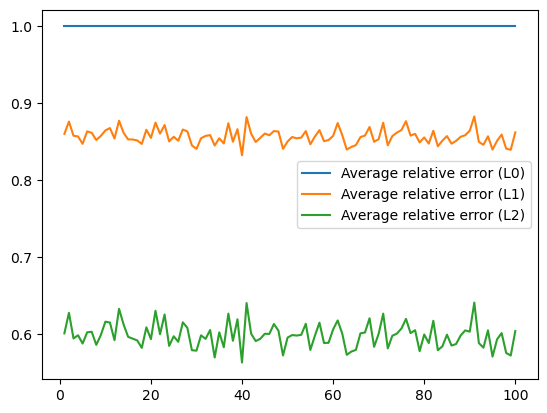

In [10]:
plt.figure()
plt.plot(p_vec, avgErr_l0, label='Average relative error (L0)')
plt.plot(p_vec, avgErr_l1, label='Average relative error (L1)')
plt.plot(p_vec, avgErr_l2, label='Average relative error (L2)')
plt.legend()
plt.show()

(b) Repeat the above experiment for $K=1$ through $K=20$. What changes?

In [11]:
K_vec = np.arange(1,20+1)

In [12]:
def rel_error_k(n, p, nsim, K_vec):
    
    Psi = np.zeros((n,n,len(K_vec)))
    s = np.zeros((n,len(K_vec)))

    for i in range(len(K_vec)):
        Psi[:,:,i] = dct(np.eye(n))
        id_ones = np.random.choice(n, K_vec[i])
        s[id_ones,i] = 1
        s[:,i] = Psi[:,:,i] @ (Psi[:,:,i]@s[:,i])
    
    k = len(K_vec)
    p = len(p_vec)
    
    err_l0 = np.zeros((nsim, k))
    err_l1 = np.zeros((nsim, k))
    err_l2 = np.zeros((nsim, k))
    
    for j in range(nsim):
        for m in range(k):
            C = np.random.normal(loc=0.0, scale=1.0, size=(p,n))
            Theta = C @ Psi[:,:,m] 
            y = Theta @ s[:,m]

            s_hat = cosamp(Theta, y, 10, epsilon=1.e-10, max_iter=10) 

            err_l0[j,m] = np.linalg.norm(s_hat-s[:,m], ord=0)/ np.linalg.norm(s[:,m], ord=0)
            err_l1[j,m] = np.linalg.norm(s_hat-s[:,m], ord=1)/ np.linalg.norm(s[:,m], ord=1)
            err_l2[j,m] = np.linalg.norm(s_hat-s[:,m], ord=2)/ np.linalg.norm(s[:,m], ord=2)

    return err_l0, err_l1, err_l2


In [13]:
err_l0, err_l1, err_l2 = rel_error_k(n=n, p=50, nsim=10, K_vec=K_vec)

C:\Users\cchal\OneDrive - University Of Houston\Course_UH\22FA-M6397\M6397-HW-ChenL\Exercises\..\UTILS\cosamp_fn.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


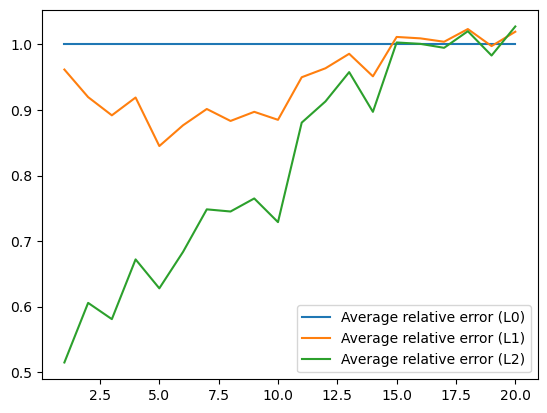

In [14]:
avgErr_l0 = np.mean(err_l0, axis=0)
avgErr_l1 = np.mean(err_l1, axis=0)
avgErr_l2 = np.mean(err_l2, axis=0)

plt.figure()
plt.plot(K_vec, avgErr_l0, label='Average relative error (L0)')
plt.plot(K_vec, avgErr_l1, label='Average relative error (L1)')
plt.plot(K_vec, avgErr_l2, label='Average relative error (L2)')
plt.legend()
plt.show()

(c) Now repeat the above experiment for $K=5$, varing the signal size using $n=100$, $n=500$, $n=1000$, $n=2000$, and $n=5000$.

In [15]:
def rel_error_n(n_vec, p, nsim, K):
    
    n = len(n_vec)
    
    err_l0 = np.zeros((n, nsim))
    err_l1 = np.zeros((n, nsim))
    err_l2 = np.zeros((n, nsim))

    for i in range(n):
        Psi = dct(np.eye(n_vec[i]))
        s = np.zeros((n_vec[i],))

        id_ones = np.random.choice(n_vec[i], K)
        s[id_ones] = 1
        s = Psi @ (Psi@s)
        
        for m in range(nsim):
            C = np.random.normal(loc=0.0, scale=1.0, size=(p,n_vec[i]))
            Theta = C @ Psi
            y = Theta @ s

            s_hat = cosamp(Theta, y, 10, epsilon=1.e-10, max_iter=10**2) 

            err_l0[i,m] = np.linalg.norm(s_hat-s, ord=0)/ np.linalg.norm(s, ord=0)
            err_l1[i,m] = np.linalg.norm(s_hat-s, ord=1)/ np.linalg.norm(s, ord=1)
            err_l2[i,m] = np.linalg.norm(s_hat-s, ord=2)/ np.linalg.norm(s, ord=2)

    return err_l0, err_l1, err_l2


In [16]:
n_vec = (100, 500, 1000, 2000, 5000)

In [17]:
err_l0, err_l1, err_l2 = rel_error_n(n_vec=n_vec, p=50, nsim=10, K=5)

C:\Users\cchal\OneDrive - University Of Houston\Course_UH\22FA-M6397\M6397-HW-ChenL\Exercises\..\UTILS\cosamp_fn.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


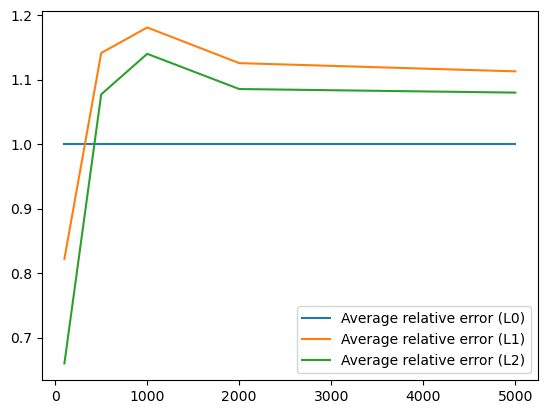

In [18]:
avgErr_l0 = np.mean(err_l0, axis=-1)
avgErr_l1 = np.mean(err_l1, axis=-1)
avgErr_l2 = np.mean(err_l2, axis=-1)

plt.figure()
plt.plot(n_vec, avgErr_l0, label='Average relative error (L0)')
plt.plot(n_vec, avgErr_l1, label='Average relative error (L1)')
plt.plot(n_vec, avgErr_l2, label='Average relative error (L2)')
plt.legend()
plt.show()